# 옥상녹화 유형별 온도 저감 효과 분석

잔디 / 세덤류 / 관목류 녹화 유형에 따른 온도 저감 효과를 시간대별·월별로 분석합니다.

**데이터 출처**: 팀 자체 정리 (논문 기반)  
**작성자**: 옥상이몽 팀  
**최종 수정일**: 2025.12

## 1. 환경 설정 및 라이브러리 불러오기

In [ ]:
# 한글 폰트 지원 패키지 설치 (최초 1회만 실행)
# !pip install koreanize-matplotlib -q

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import font_manager, rc

# 1. 스타일 설정을 가장 먼저 합니다!
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('axes', unicode_minus=False)

# 2. 그 다음 폰트를 설정해야 덮어써지지 않습니다.
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
# 출력 폴더 생성 (없으면 자동 생성)
OUTPUT_DIR = '../outputs/figures'
os.makedirs(OUTPUT_DIR, exist_ok=True)

---
## 2. 시간대별 온도 저감 분석

하루 중 시간대(10시~16시)에 따른 녹화 유형별 온도 저감 효과를 분석합니다.

### 2.1 데이터 불러오기 및 전처리

In [3]:
# 시간별 온도 데이터 불러오기
DATA_PATH = '../data/raw/01_temperature_reduction'

time_temp = pd.read_csv(f'{DATA_PATH}/hourly_temp_raw(grass_sedum_shrub).csv')
print("=== 원본 데이터 ===")
time_temp.head()

=== 원본 데이터 ===


,Time,Metric,N1(미실시),N2(잔디),N3(관목류),N4(세덤류)
0,10시,평균,27.9,26.5,26.6,26.1
1,10시,최고,36.6,33.8,34.8,33.5
2,10시,최저,19.6,19.4,18.5,17.4
3,12시,평균,30.6,29.1,29.5,28.8
4,12시,최고,38.2,34.7,35.8,34.4


In [4]:
# 온도 저감량 계산 (미실시 온도 - 각 유형 온도)
time_temp['잔디저감(°C)'] = time_temp['N1(미실시)'] - time_temp['N2(잔디)']
time_temp['관목저감(°C)'] = time_temp['N1(미실시)'] - time_temp['N3(관목류)']
time_temp['세덤저감(°C)'] = time_temp['N1(미실시)'] - time_temp['N4(세덤류)']

print("=== 저감량 컬럼 추가 후 ===")
time_temp.head()

=== 저감량 컬럼 추가 후 ===


,Time,Metric,N1(미실시),N2(잔디),N3(관목류),N4(세덤류),잔디저감(°C),관목저감(°C),세덤저감(°C)
0,10시,평균,27.9,26.5,26.6,26.1,1.4,1.3,1.8
1,10시,최고,36.6,33.8,34.8,33.5,2.8,1.8,3.1
2,10시,최저,19.6,19.4,18.5,17.4,0.2,1.1,2.2
3,12시,평균,30.6,29.1,29.5,28.8,1.5,1.1,1.8
4,12시,최고,38.2,34.7,35.8,34.4,3.5,2.4,3.8


In [5]:
# 필터링: '최고' 온도 데이터만 사용, '전체' 요약 행 제외
df_hourly = time_temp[time_temp['Metric'] == '최고'].copy()
df_hourly = df_hourly[df_hourly['Time'].str.contains('시')]

# 시간 순서 정렬
time_order = ['10시', '12시', '14시', '16시']
df_hourly['Time'] = pd.Categorical(df_hourly['Time'], categories=time_order, ordered=True)
df_hourly = df_hourly.sort_values('Time')

print("=== 시각화용 필터링 데이터 ===")
print(df_hourly[['Time', '잔디저감(°C)', '관목저감(°C)', '세덤저감(°C)']])

=== 시각화용 필터링 데이터 ===
   Time  잔디저감(°C)  관목저감(°C)  세덤저감(°C)
1   10시       2.8       1.8       3.1
4   12시       3.5       2.4       3.8
7   14시       3.0       1.9       3.4
10  16시       1.4       0.8       2.1


### 2.2 시간대별 시각화

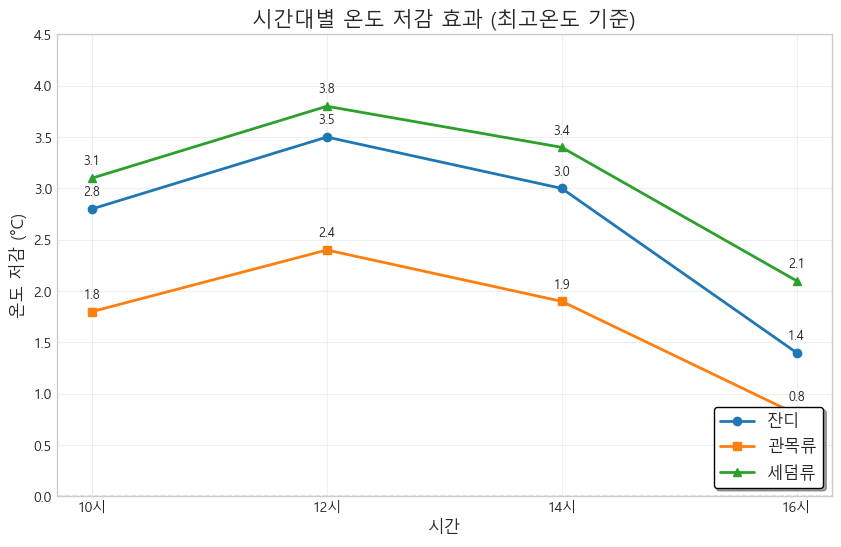

저장 완료: ../outputs/figures/green_roof_hourly_reduction.png


In [10]:
# 시간대별 온도 저감 그래프
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
plt.plot(df_hourly['Time'], df_hourly['잔디저감(°C)'], marker='o', label='잔디', linewidth=2)
plt.plot(df_hourly['Time'], df_hourly['관목저감(°C)'], marker='s', label='관목류', linewidth=2)
plt.plot(df_hourly['Time'], df_hourly['세덤저감(°C)'], marker='^', label='세덤류', linewidth=2)

# 데이터 레이블 추가
for i, txt in enumerate(df_hourly['잔디저감(°C)']):
    plt.text(df_hourly['Time'].iloc[i], df_hourly['잔디저감(°C)'].iloc[i] + 0.1, f'{txt:.1f}', ha='center', va='bottom', fontsize=9)
for i, txt in enumerate(df_hourly['관목저감(°C)']):
    plt.text(df_hourly['Time'].iloc[i], df_hourly['관목저감(°C)'].iloc[i] + 0.1, f'{txt:.1f}', ha='center', va='bottom', fontsize=9)
for i, txt in enumerate(df_hourly['세덤저감(°C)']):
    plt.text(df_hourly['Time'].iloc[i], df_hourly['세덤저감(°C)'].iloc[i] + 0.1, f'{txt:.1f}', ha='center', va='bottom', fontsize=9)

# 그래프 스타일링
plt.title('시간대별 온도 저감 효과 (최고온도 기준)', fontsize=15)
plt.xlabel('시간', fontsize=12)
plt.ylabel('온도 저감 (°C)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(fontsize=12, loc='lower right', frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.grid(True, alpha=0.3)
plt.ylim(0, 4.5)

# 저장 및 출력
plt.savefig(f'{OUTPUT_DIR}/green_roof_hourly_reduction.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"저장 완료: {OUTPUT_DIR}/green_roof_hourly_reduction.png")

---
## 3. 월별 온도 저감 분석

여름철(7월~10월) 월별 녹화 유형에 따른 온도 저감 효과를 분석합니다.

### 3.1 데이터 불러오기 및 전처리

In [11]:
# 월별 온도 데이터 불러오기
month_temp = pd.read_csv(f'{DATA_PATH}/monthly_temp_raw(grass_sedum_shrub).csv')
print("=== 원본 데이터 ===")
month_temp.head()

=== 원본 데이터 ===


,Month,Metric,N1(미실시),N2(잔디),N3(관목류),N4(세덤류)
0,7월,평균,31.6,29.8,29.7,29.4
1,7월,최고,38.5,35.6,36.5,35.2
2,7월,최저,23.1,22.3,21.7,22.1
3,8월,평균,32.0,31.0,30.7,30.3
4,8월,최고,37.1,33.9,34.6,32.4


In [12]:
# 온도 저감량 계산
month_temp['잔디저감(°C)'] = month_temp['N1(미실시)'] - month_temp['N2(잔디)']
month_temp['관목저감(°C)'] = month_temp['N1(미실시)'] - month_temp['N3(관목류)']
month_temp['세덤저감(°C)'] = month_temp['N1(미실시)'] - month_temp['N4(세덤류)']

print("=== 저감량 컬럼 추가 후 ===")
month_temp.head()

=== 저감량 컬럼 추가 후 ===


,Month,Metric,N1(미실시),N2(잔디),N3(관목류),N4(세덤류),잔디저감(°C),관목저감(°C),세덤저감(°C)
0,7월,평균,31.6,29.8,29.7,29.4,1.8,1.9,2.2
1,7월,최고,38.5,35.6,36.5,35.2,2.9,2.0,3.3
2,7월,최저,23.1,22.3,21.7,22.1,0.8,1.4,1.0
3,8월,평균,32.0,31.0,30.7,30.3,1.0,1.3,1.7
4,8월,최고,37.1,33.9,34.6,32.4,3.2,2.5,4.7


In [13]:
# 필터링: '최고' 온도 데이터만 사용
df_monthly = month_temp[month_temp['Metric'] == '최고'].copy()
df_monthly = df_monthly[df_monthly['Month'].str.contains('월')]

# 월 순서 정렬
month_order = ['7월', '8월', '9월', '10월']
df_monthly['Month'] = pd.Categorical(df_monthly['Month'], categories=month_order, ordered=True)
df_monthly = df_monthly.sort_values('Month')

print("=== 시각화용 필터링 데이터 ===")
print(df_monthly[['Month', '잔디저감(°C)', '관목저감(°C)', '세덤저감(°C)']])

=== 시각화용 필터링 데이터 ===
   Month  잔디저감(°C)  관목저감(°C)  세덤저감(°C)
1     7월       2.9       2.0       3.3
4     8월       3.2       2.5       4.7
7     9월       3.0       1.9       3.4
10   10월       1.8       1.7       2.3


### 3.2 월별 시각화

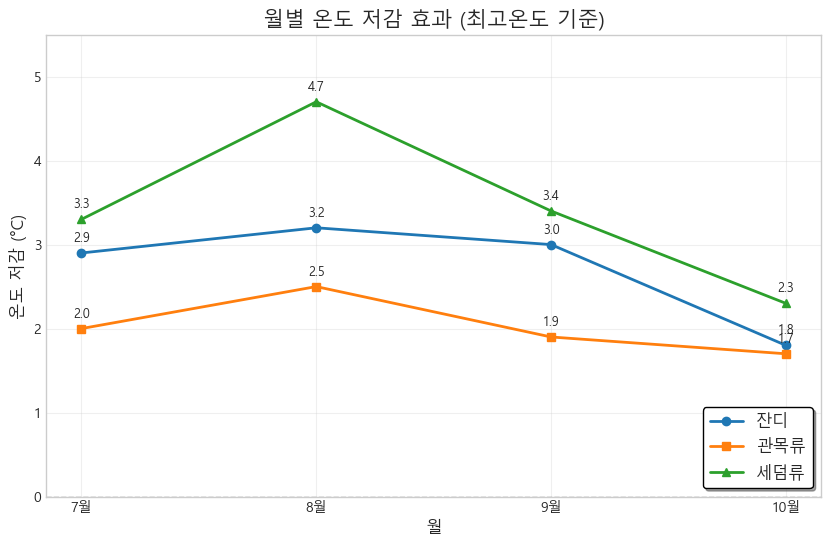

저장 완료: ../outputs/figures/green_roof_monthly_reduction.png


In [14]:
# 월별 온도 저감 그래프
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
plt.plot(df_monthly['Month'], df_monthly['잔디저감(°C)'], marker='o', label='잔디', linewidth=2)
plt.plot(df_monthly['Month'], df_monthly['관목저감(°C)'], marker='s', label='관목류', linewidth=2)
plt.plot(df_monthly['Month'], df_monthly['세덤저감(°C)'], marker='^', label='세덤류', linewidth=2)

# 데이터 레이블 추가
for i, txt in enumerate(df_monthly['잔디저감(°C)']):
    plt.text(df_monthly['Month'].iloc[i], df_monthly['잔디저감(°C)'].iloc[i] + 0.1, f'{txt:.1f}', ha='center', va='bottom', fontsize=9)
for i, txt in enumerate(df_monthly['관목저감(°C)']):
    plt.text(df_monthly['Month'].iloc[i], df_monthly['관목저감(°C)'].iloc[i] + 0.1, f'{txt:.1f}', ha='center', va='bottom', fontsize=9)
for i, txt in enumerate(df_monthly['세덤저감(°C)']):
    plt.text(df_monthly['Month'].iloc[i], df_monthly['세덤저감(°C)'].iloc[i] + 0.1, f'{txt:.1f}', ha='center', va='bottom', fontsize=9)

# 그래프 스타일링
plt.title('월별 온도 저감 효과 (최고온도 기준)', fontsize=15)
plt.xlabel('월', fontsize=12)
plt.ylabel('온도 저감 (°C)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(fontsize=12, loc='lower right', frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.grid(True, alpha=0.3)
plt.ylim(0, 5.5)

# 저장 및 출력
plt.savefig(f'{OUTPUT_DIR}/green_roof_monthly_reduction.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"저장 완료: {OUTPUT_DIR}/green_roof_monthly_reduction.png")

---
## 4. 요약 통계

In [15]:
# 요약 테이블 생성
summary = pd.DataFrame({
    '녹화 유형': ['잔디', '관목류', '세덤류'],
    '시간별 최대 저감(°C)': [
        df_hourly['잔디저감(°C)'].max(),
        df_hourly['관목저감(°C)'].max(),
        df_hourly['세덤저감(°C)'].max()
    ],
    '최대 저감 시간대': ['12시', '12시', '12시'],
    '월별 최대 저감(°C)': [
        df_monthly['잔디저감(°C)'].max(),
        df_monthly['관목저감(°C)'].max(),
        df_monthly['세덤저감(°C)'].max()
    ],
    '최대 저감 월': ['8월', '8월', '8월']
})

print("=== 온도 저감 효과 요약 ===")
summary

=== 온도 저감 효과 요약 ===


,녹화 유형,시간별 최대 저감(°C),최대 저감 시간대,월별 최대 저감(°C),최대 저감 월
0,잔디,3.5,12시,3.2,8월
1,관목류,2.4,12시,2.5,8월
2,세덤류,3.8,12시,4.7,8월


---
## 5. 결론

### 5.1 유형별 온도 저감 효과

| 유형 | 시간별 최대 | 월별 최대 | 순위 |
|------|------------|----------|------|
| **세덤류** | 3.8°C | 4.7°C | 🥇 1위 |
| **잔디** | 3.5°C | 3.2°C | 🥈 2위 |
| **관목류** | 2.4°C | 2.5°C | 🥉 3위 |

### 5.2 주요 발견

1. **세덤류가 가장 효과적** - 시간별/월별 모두 최고 저감 효과
2. **12~14시에 저감 효과 최대** - 태양 복사열 흡수 및 증발산 효과가 집중되는 시간대
3. **8월에 저감 효과 극대화** - 여름철 폭염 시 냉방 부하 저감 기대

### 5.3 G-SEED 정책 시사점

- 현행 G-SEED는 **토심(soil depth)만 평가** → 온도저감 정량 지표 추가 필요
- 녹화 유형별 **차등 가점** 고려 (세덤류 > 잔디 > 관목류)